# Economic Order Quantity

History

* Formulated in 1982 by Ziegler. Extension of classic EOQ problem
* Reformulated in 2004 SOCP by Kuo & Mittleman, cited by Letchford and El Ghaoui
* See Bretthauer for related applications

Relevance

* Demonstrates reformulation of hyperbolic constraints as SOCP
* The example is familiar to any business student.
* Significant range off business applications including warehouse operations.

## References

Bretthauer, K. M., & Shetty, B. (1995). The nonlinear resource allocation problem. Operations research, 43(4), 670-683. https://www.jstor.org/stable/171693?seq=1

Kuo, Y. J., & Mittelmann, H. D. (2004). Interior point methods for second-order cone programming and OR applications. Computational Optimization and Applications, 28(3), 255-285. https://link.springer.com/content/pdf/10.1023/B:COAP.0000033964.95511.23.pdf

Letchford, A. N., & Parkes, A. J. (2018). A guide to conic optimisation and its applications. RAIRO-Operations Research, 52(4-5), 1087-1106. http://www.cs.nott.ac.uk/~pszajp/pubs/conic-guide.pdf

Lobo, M. S., Vandenberghe, L., Boyd, S., & Lebret, H. (1998). Applications of second-order cone programming. Linear algebra and its applications, 284(1-3), 193-228. https://web.stanford.edu/~boyd/papers/pdf/socp.pdf

Ziegler, H. (1982). Solving certain singly constrained convex optimization problems in production planning. Operations Research Letters, 1(6), 246-252.

El Ghaoui, Laurent (2018). Lecture notes on Optimization Models. https://inst.eecs.berkeley.edu/~ee127/fa19/Lectures/12_socp.pdf


## EOQ Model

### Classical formulation

The economic order quantity (EOQ) is a classical problem in inventory management attributed in Ford Harris (1913). The problem is to find the size of a that minimizes the cost of maintaining that item in an inventory. 

The cost $f(x)$ for maintaining an item in inventory given given an order size $x$ is

$$f(x) = \frac{h x}{2} + \frac{c d}{x}$$

where $x$ is the $h$ is the annual cost of holding an item including any financing charges, $c$ are the fixed costs of placing and receiving an order, and $d$ is the annual demand. The factor $\frac{1}{2}$ is a result of demand depletes the inventory at a constant rate over the year. The economic order quantity is the value of $x$ minimizing $f(x)$

$$
\begin{align*}
EOQ = \arg\min_x\ & f(x) = \frac{h x}{2} + \frac{c d}{x} \\
\text{s.t.}\quad x & > 0 \\
\end{align*}
$$

The solution to this problem is found by setting the derivative of $f(x)$ equal to zero.

$$
\begin{align*}
EOQ = x^{opt} & = \sqrt{\frac{2 c d}{h}} \\
f^{opt} & = \sqrt{2 c d h} 
\end{align*}
$$

The following chart illustrates the nature of the problem and its analytical solution.

Optimal order size = 3651.5 items with cost 2738.61


(0.0, 6000.0)

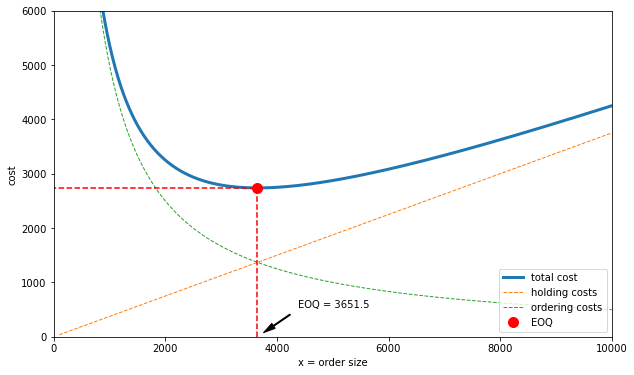

In [147]:
import matplotlib.pyplot as plt
import numpy as np

h = 0.75      # cost of holding one time for one year 
c = 500.0     # cost of processing one order
d = 10000.0   # annual demand

eoq = np.sqrt(2*c*d/h)
fopt = np.sqrt(2*c*d*h)
print(f"Optimal order size = {eoq:0.1f} items with cost {fopt:0.2f}")

x = np.linspace(100, 10000, 1000)
f = h*x/2 + c*d/x

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, f, lw=3, label="total cost")
ax.plot(x, h*x/2, '--', lw=1, label="holding costs")
ax.plot(x,  c*d/x, '--', lw=1, label="ordering costs")
ax.set_xlabel("x = order size")
ax.set_ylabel("cost")
ax.plot(eoq, fopt, 'ro', ms=10, label="EOQ")
ax.legend(loc='lower right')
ax.annotate(f"EOQ = {eoq:0.1f}", xy=(eoq, 0), xytext=(1.2*eoq, 0.2*fopt),
           arrowprops=dict(facecolor="black", shrink=0.15, width=1, headwidth=6))
ax.plot([eoq, eoq, 0], [0, fopt, fopt], 'r--')
ax.set_xlim(0, 10000)
ax.set_ylim(0, 6000)

### Reformulating EOQ as a linear objective with hyperbolic constraint

The optimization objective is linearized with the use of a second decision variable $y = 1/x$. The optimization problem is now a linear objective in two decision variables with a hyperbolic constraint $xy \geq 1$.

$$
\begin{align*}
\min_{x, y}\ & f(x, y) = \frac{h x}{2} + c d y \\
\text{s.t.}\quad x\,y & \geq 1 \\
x, y & > 0 \\
\end{align*}
$$

As the following diagrams the solution to this optimization problem.


7.5e-08


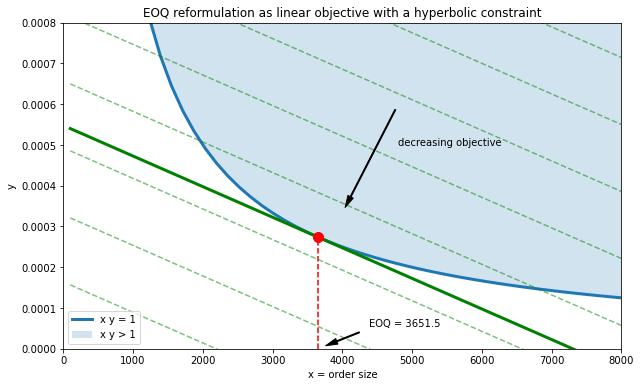

In [148]:
h = 0.75      # cost of holding one time for one year 
c = 500.0     # cost of processing one order
d = 10000.0   # annual demand

x = np.linspace(100, 8000)
y = (fopt - h*x/2)/(c*d)

eoq = np.sqrt(2*c*d/h)
fopt = np.sqrt(2*c*d*h)
yopt = (fopt - h*eoq/2)/(c*d)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, 1/x, lw=3, label="x y = 1")
ax.plot(x, (fopt - h*x/2)/(c*d), 'g', lw=3)
for f in fopt*np.linspace(0, 3, 11):
    ax.plot(x, (f - h*x/2)/(c*d), 'g--', alpha=0.5)
ax.plot(eoq, yopt, 'ro', ms=10)
ax.annotate(f"EOQ = {eoq:0.1f}", xy=(eoq, 0), xytext=(1.2*eoq, 0.2*yopt),
           arrowprops=dict(facecolor="black", shrink=0.15, width=1, headwidth=6))

grad = h/(2*c*d)
print(grad)
ax.annotate("", xytext=(4800, 0.0006), xy=(4000, 1/3000),
           arrowprops=dict(facecolor="black", shrink=0.05, width=1, headwidth=6))
ax.text(4800, .0005, "decreasing objective")
ax.fill_between(x, 1/x, 0.0008, alpha=0.2, label="x y > 1")
ax.plot([eoq, eoq], [0, yopt], 'r--')

ax.set_xlim(0, 8000)
ax.set_ylim(0, .0008)
ax.set_xlabel('x = order size')
ax.set_ylabel('y')
ax.set_title("EOQ reformulation as linear objective with a hyperbolic constraint")
ax.legend()


## Reformulating EOQ as a linear objective with second order cone constraint

Given that a hyperbola results from the intersection of plane with cone, the hyperbola described by the constraint $x y \leq 1$ invites the question of another reformulation of EOQ with a cone constraint.

The following diagram draws the intersection of a plane with Lorenz cone. The Lorenz cone is define by

$$
\begin{align*}
C & = \{ (z, t)\in\mathbb{R}^3 \ | \ \| z \|_2 \leq t \}
\end{align*}
$$

where the components of are given by 

$$z = \begin{bmatrix} u \\ v \end{bmatrix}$$

The intersection of a plane aligned with the $t$ axis exactly describes a hyperbola. As described by Lobo, et al. (1998), the correspondence is given by

$$w^2 \leq x y,\ x, y\geq 0,\ \iff \|\begin{bmatrix} 2w \\ x-y \end{bmatrix} \|_2 \leq x + y $$

where the axis in the $w, x, y$ coordinates is tilted, displaced, and stretched compared to the coordinates shown in the diagram. The exact correspondence to the diagram is given by

$$\begin{align*}
u & \sim 2 w \\
v & \sim x - y \\
t & \sim x + y
\end{align*}$$

Text(0.5, 0.5, 'v')

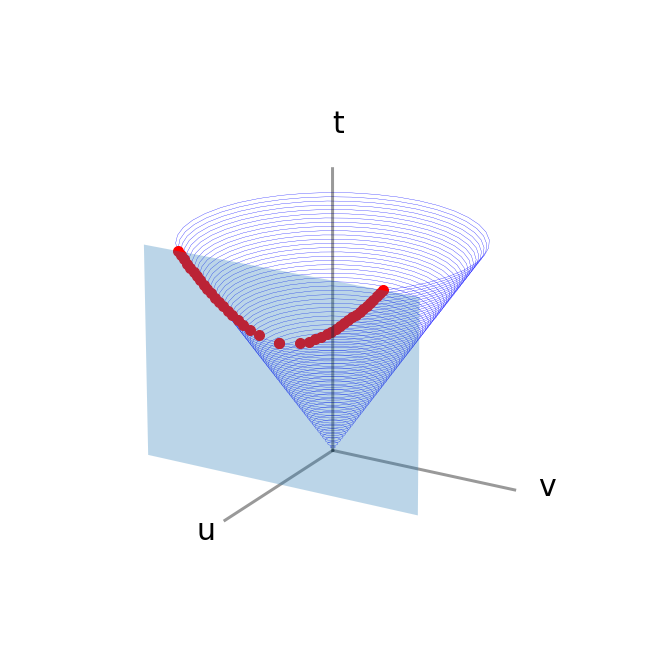

In [149]:
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

w = 2
for t in np.linspace(0, 3, 61):
    if t < w:
        a = np.linspace(0, 2*np.pi, 30)
        u = t*np.cos(a)
        v = t*np.sin(a)
        ax.plot3D(u, v, t, 'b', lw=0.3)
    else:
        b = np.arccos(w/t)
        a = np.linspace(b, 2*np.pi-b, 30)
        u = t*np.cos(a)
        v = t*np.sin(a)
        ax.plot3D(u, v, t, 'b', lw=0.3) 
        ax.plot3D(t*np.cos(b), t*np.sin(b), t, 'ro', ms=10)
        ax.plot3D(t*np.cos(b), -t*np.sin(b), t, 'ro', ms=10)
        
ax.plot3D([0, 4], [0, 0], [0, 0], 'k', lw=3, alpha=0.4)
ax.plot3D([0, 0], [0, 4], [0, 0], 'k', lw=3, alpha=0.4)
ax.plot3D([0, 0], [0, 0], [0, 4], 'k', lw=3, alpha=0.4)

ax.text3D(5, 0, 0, 'u', fontsize=30)
ax.text3D(0, 4.5, 0, 'v', fontsize=30)
ax.text3D(0, 0, 4.5, 't', fontsize=30)

ax.view_init(elev=20, azim=30)

r = Rectangle((-3, 0), 6, 3, alpha=0.3)
ax.add_patch(r)
art3d.pathpatch_2d_to_3d(r, z=2, zdir="x")

ax.grid(False)
ax.axis('off')

ax.set_xlabel('u')
ax.set_ylabel('v')


The result is a reformulation of the EOQ problem as a second order conic program (SOCP).

$$\begin{align*}
\min_{x, y}\  f(x, y) = \frac{h x}{2} + c d y \\
\text{s.t.}\quad \|\begin{bmatrix} 2 \\ x-y \end{bmatrix} \|_2 \leq x + y
\end{align*}
$$

## Modeling with `pyomo.kernel`

The [Pyomo kernel library](https://pyomo.readthedocs.io/en/stable/library_reference/kernel/index.html#) provides an experimental modeling interface for advanced application development with Pyomo. In particular, the kernel library provides direct support for conic constraints with the commercial Mosek solver (note that academic licenses are available at no cost, and that a demo version of Mosek is available on Google Colab). 

Pyomo/Mosek includes six forms for conic constraints. The `conic.quadratic` constraint is expressed in the form

$$\sum_{i} x_i^2 \leq r^2, \ r \geq 0$$

where the $x_i$ and $r$ terms are pyomo.kernel variables. 

Reformulating the EOQ problem one more time to use the Pyomo/Mosek conic solver yields

$$\begin{align*}
\min_{x, y}\  f(x, y) & = \frac{h x}{2} + c d y \\
t & = x + y \\
u & = 2 \\
v & = x - y \\
u^2 + v^2 & \leq t^2 \\
x, y, t, u, v & \geq 0
\end{align*}$$

The EOQ model is now ready to implement with Pyomo.

In [190]:
import pyomo.kernel as pmo

m = pmo.block()

# define decision variables
m.x = pmo.variable(domain=pyo.NonNegativeReals)
m.y = pyo.variable(domain=pyo.NonNegativeReals)

# define variables for conic constraints
m.u = pmo.variable(domain=pyo.NonNegativeReals)
m.v = pmo.variable(domain=pyo.NonNegativeReals)
m.t = pmo.variable(domain=pyo.NonNegativeReals)

# relationships for conic constraints to decision variables
m.u_eq = pmo.constraint(m.u == 2)
m.v_eq = pmo.constraint(m.v == m.x - m.y)
m.t_eq = pmo.constraint(m.t == m.x + m.y)

# conic constraint
m.q = pmo.conic.quadratic(m.t, [m.u, m.v])

# linear objective
m.eoq = pmo.objective(h*m.x/2 + c*d*m.y)

# solve with Mosek
solver = pyo.SolverFactory('mosek')
solver.solve(m)

# solution
print(f"\nEOQ = {m.x():0.2f}")


EOQ = 3652.10


## Multi-Item Model

Solving for the EOQ for a single item using SOCP programming is using a sledgehammer to swat a fly. The problem becomes more interesting, however, for the case of determining economic order quantities for multiple items that compete for resources in a common warehouse.

Extending the notation of the single item model

$$
\begin{align*}
\min & \quad \sum_{i=1}^n \frac{h x_i}{2} + \frac{c_i d_i}{x_i} \\
\text{s.t.} & \quad \sum_{i=1}^n b_i x_i  \leq b_0 \\
& 0 < lb_i \leq x_i \leq ub_i & \forall i\in 1, \dots, n \\
\end{align*}
$$

where $h_i$ is the annual holding cost for one unit of item $i$, $c_i$ is the cost to place an order and receive delivery for item $i$, and $d_i$ is the annual demand. 

The additional constraint models the allocation of a shared resource to hold the inventory. The shared resource could he financing available to hold inventory, space in a warehouse, or specialized facilities to hold a perishable good. Parameter $b_i$ is the amount of resource needed to store one unit of item i, and $b_0$ is the total resource available.

Following the reformulation of the single item model, a variable $y_i 
\geq 0$, $i=1, \dots, n$ is introduced to linearize the objective

$$
\begin{align*}
\min \quad \sum_{i=1}^n \frac{h x_i}{2} & + c_i d_i y_i \\
\text{s.t.} \quad \sum_{i=1}^n b_i x_i &  \leq b_0 \\
x_i y_i & \geq 1 & \forall i\in 1, \dots, n \\
0 < lb_i \leq x_i & \leq ub_i & \forall i\in 1, \dots, n \\
y_i & \geq 0 & \forall i\in 1, \dots, n \\
\end{align*}
$$

As a short cut to reformulating the model with conic constraints, note that a "completion of square" gives the needed substitutions

$$
\begin{align*}
(x_i + y_i)^2  = x_i^2 + 2 x_i y_i + y_i^2 \\
- (x_i - y_i)^2  = - x_i^2 + 2 x_i y_i - y_i^2 \\
\rule{6cm}{0.4pt} \\
\implies (x_i + y_i)^2 - (x_i - y_i)^2  = 4 x_i y_i \\
\end{align*}
$$

The multi-item EOQ model is now written with conic constraints

$$
\begin{align*}
\min \quad \sum_{i=1}^n \frac{h x_i}{2} & + c_i d_i y_i \\
\text{s.t.} \quad \sum_{i=1}^n b_i x_i &  \leq b_0 \\
4 + (x_i - y_i)^2 & \leq (x_i + y_i)^2 & \forall i\in 1, \dots, n \\
0 < lb_i \leq x_i & \leq ub_i & \forall i\in 1, \dots, n \\
y_i & \geq 0 & \forall i\in 1, \dots, n \\
\end{align*}
$$

Variables $t_i$, $u_i$, and $v_i$ are introduced t complete the reformulation for implementation with Pyomo/Mosek.


$$
\begin{align*}
\min \quad \sum_{i=1}^n \frac{h x_i}{2} & + c_i d_i y_i \\
\text{s.t.} \quad \sum_{i=1}^n b_i x_i &  \leq b_0 \\
t_i & = x_i + y_i & \forall i\in 1, \dots, n \\
u_i & = 2 & \forall i \in 1, \dots, n \\
v_i & = x_i - y_i & \forall i\in 1, \dots, n \\
u_i^2 + v_i^2 & \leq t_i^2 & \forall i\in 1, \dots, n \\
0 < lb_i \leq x_i & \leq ub_i & \forall i\in 1, \dots, n \\
t_i, u_i, v_i, y_i & \geq 0 & \forall i\in 1, \dots, n \\
\end{align*}
$$

## Pyomo Model

The following Pyomo/Mosek model is a direct implementation of the multi-time EOQ formulation.

In [347]:
import pandas as pd

df = pd.DataFrame({
    "all weather":   {"h": 1.0, "c": 200, "d": 1300, "b": 3},
    "truck":         {"h": 2.8, "c": 250, "d":  700, "b": 8},
    "heavy duty":    {"h": 1.2, "c": 200, "d":  500, "b": 5},
    "low cost":      {"h": 0.8, "c": 180, "d": 2000, "b": 3},
}).T

display(df)

,h,c,d,b
all weather,1.0,200.0,1300.0,3.0
truck,2.8,250.0,700.0,8.0
heavy duty,1.2,200.0,500.0,5.0
low cost,0.8,180.0,2000.0,3.0


,EOQ,Space Req'd
product,,
all weather,306.2,918.7
truck,153.2,1225.3
heavy duty,151.0,754.9
low cost,367.0,1101.1


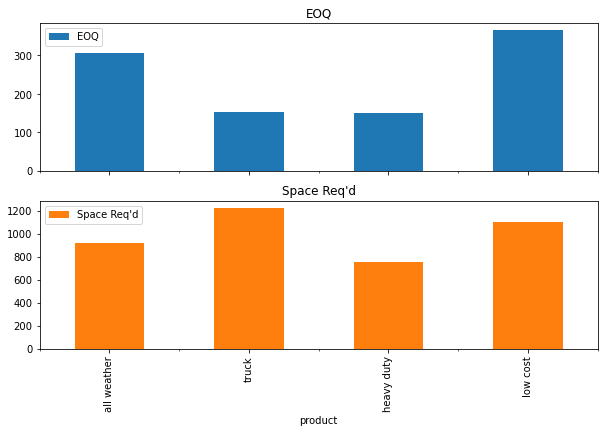

In [348]:
import pyomo.kernel as pmo

def eoq(df, b):

    m = pmo.block()

    m.b = pmo.parameter(b)

    m.I = df.index

    # variable dictionaries
    m.x = pmo.variable_dict()
    for i in m.I:
        m.x[i] = pmo.variable(domain=pyo.NonNegativeReals)

    m.y = pmo.variable_dict()
    for i in m.I:
        m.y[i] = pmo.variable(domain=pyo.NonNegativeReals)

    m.t = pmo.variable_dict()
    for i in m.I:
        m.t[i] = pmo.variable(domain=pyo.NonNegativeReals)

    m.u = pmo.variable_dict()
    for i in m.I:
        m.u[i] = pmo.variable(domain=pyo.NonNegativeReals)

    m.v = pmo.variable_dict()
    for i in m.I:
        m.v[i] = pmo.variable(domain=pyo.NonNegativeReals)

    # constraints= dictionaries
    m.t_eq = pmo.constraint_dict()
    for i in m.I:
        m.t_eq[i] = pmo.constraint(m.t[i] == m.x[i] + m.y[i])

    m.u_eq = pmo.constraint_dict()
    for i in m.I:
        m.u_eq[i] = pmo.constraint(m.u[i] == 2)

    m.v_eq = pmo.constraint_dict()
    for i in m.I:
        m.v_eq[i] = pmo.constraint(m.v[i] == m.x[i] - m.y[i])

    m.b_cap = pyo.constraint(sum(df.loc[i, "b"]*m.x[i] for i in m.I) <= m.b)

    m.q = pmo.constraint_dict()
    for i in m.I:
        m.q[i] = pmo.conic.quadratic(m.t[i], [m.u[i], m.v[i]])

    # objective
    m.eoq = pmo.objective(sum(df.loc[i, "h"]*m.x[i]/2 + df.loc[i, "c"]*df.loc[i, "d"]*m.y[i] for i in m.I))

    # solve with Mosek
    solver = pyo.SolverFactory('mosek')
    solver.solve(m)
    
    return m

def eoq_display_results(df, m):

    results = pd.DataFrame([
        [i, m.x[i](), m.x[i]()*df.loc[i, "b"]] 
        for i in m.I],
        columns = ["product", "EOQ", "Space Req'd"]).round(1)
    results.set_index("product", inplace=True)

    display(results)
    results.plot(y = ["EOQ", "Space Req'd"], kind="bar", subplots=True, layout=(2, 1), figsize=(10, 6))
    
m = eoq(df, 4000)
eoq_display_results(df, m)

,EOQ,Space Req'd
product,,
product 000,81.3,1160.2
product 001,99.7,1422.2
product 002,83.2,1187.5
product 003,84.2,1201.7
product 004,64.8,924.1
...,...,...
product 095,84.3,1202.9
product 096,23.0,328.3
product 097,87.8,1252.5


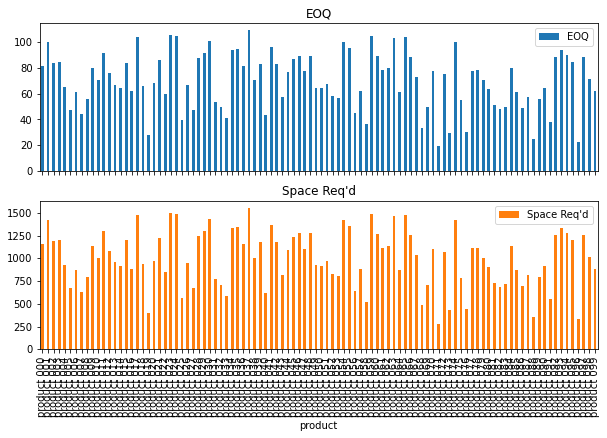

In [349]:
n = 100

df_large = pd.DataFrame()
df_large["h"] = np.random.uniform(0.5, 2.0, n)
df_large["c"] = np.random.randint(300, 500, n)
df_large["d"] = np.random.randint(100, 5000, n)
df_large["b"] = np.random.uniform(10, 50)
df_large.set_index(pd.Series(f"product {i:03d}" for i in range(n)), inplace=True)

df_large

m = eoq(df_large, 100000)
eoq_display_results(df_large, m)